In [3]:
import pandas as pd

In [45]:
# Load datasets
movies = pd.read_csv('Movie Ratings Dataset/movies.csv')
ratings = pd.read_csv('Movie Ratings Dataset/ratings.csv')


In [5]:
  # Merge movies and ratings data
movie_data = pd.merge(movies, ratings, on='movieId')

In [6]:
print(movie_data.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       3     4.0   944919407  
1       6     5.0   858275452  
2       8     4.0   833981871  
3      10     4.0   943497887  
4      11     4.5  1230858821  


In [7]:
print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 915.5+ MB
None


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print(movie_data.describe())

            movieId        userId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   9.041567e+03  6.904587e+04  3.525529e+00  1.100918e+09
std    1.978948e+04  4.003863e+04  1.051989e+00  1.621694e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    9.020000e+02  3.439500e+04  3.000000e+00  9.667977e+08
50%    2.167000e+03  6.914100e+04  3.500000e+00  1.103556e+09
75%    4.770000e+03  1.036370e+05  4.000000e+00  1.225642e+09
max    1.312620e+05  1.384930e+05  5.000000e+00  1.427784e+09


C:\ANACONDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


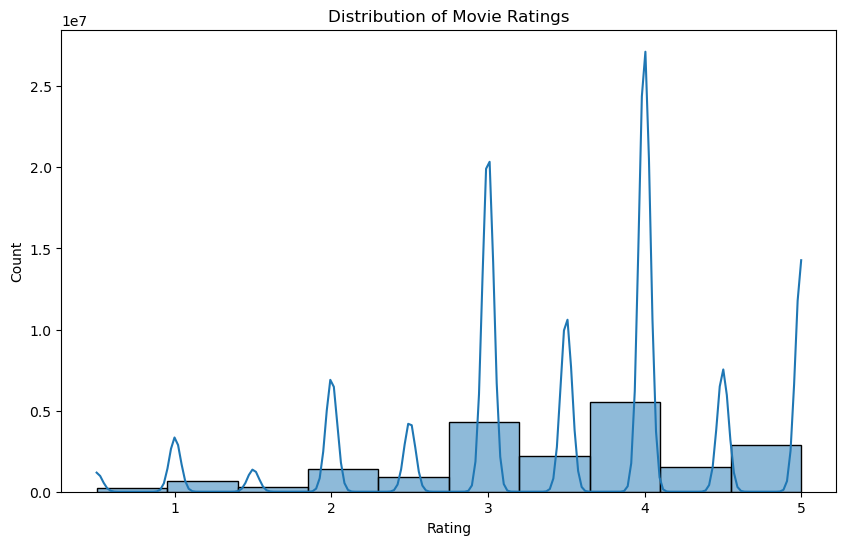

In [11]:
# Plotting ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(movie_data['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
ratings_counts = movie_data.groupby('movieId')['rating'].count()
avg_ratings = movie_data.groupby('movieId')['rating'].mean()

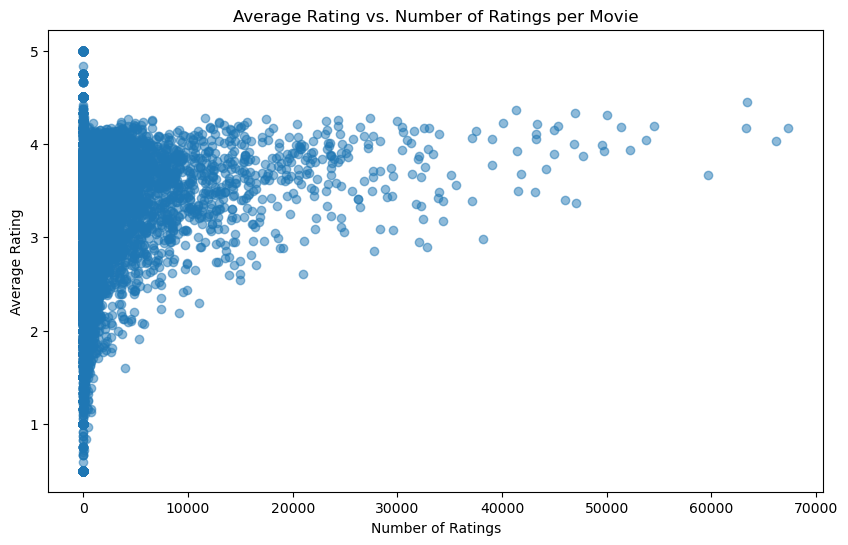

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(ratings_counts, avg_ratings, alpha=0.5)
plt.title('Average Rating vs. Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
ratings_counts = movie_data.groupby('movieId')['rating'].count().reset_index()
avg_ratings = movie_data.groupby('movieId')['rating'].mean().reset_index()

In [21]:
regression_data = pd.merge(ratings_counts, avg_ratings, on='movieId')
regression_data.columns = ['movieId', 'rating_count', 'avg_rating']

In [22]:
X = regression_data[['rating_count']]
y = regression_data['avg_rating']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.4256627642607868


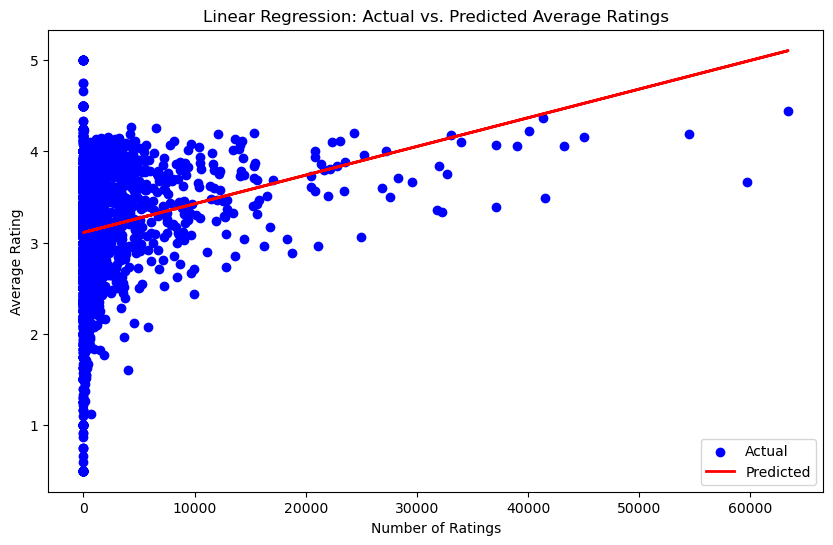

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Actual vs. Predicted Average Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

In [44]:
rating_stats = movie_data['rating'].describe()
print(rating_stats)

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
